In [4]:
import pandas as pd
from pandasql import sqldf

In [5]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

colors = list(mcolors.TABLEAU_COLORS.keys())  # 颜色变化
import matplotlib as mpl

mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams['figure.figsize'] = [10, 8]  # 图片像素
plt.rcParams['savefig.dpi'] = 600  # 分辨率
plt.rcParams["font.family"] = "Times New Roman"
compares_markers = ['s', 'o', '^', '*', 'v', 'x', 'D']


def Plotings(df_list: list, markers, labels: list = None, metric_name="NDCG@10",
             x_label=r'${\rm \epsilon}$', save_file_path: str = None, errorbar: bool = True, y_lim:tuple=(50, 100), marker_size=20):
    """
    Args:
        df_list: Got only 3 columns including x,y and std.
        markers:
        labels:
        metric_name:
        x_label:
        save_file_path:

    Returns:

    """
    # plt.figure(figsize=(10,8),dpi=150)
    fig, ax = plt.subplots()
    for i, df in enumerate(df_list):
        # names = df.columns.values
        if not errorbar:
            plt.plot(df.iloc[:, 0], df.iloc[:, 1], label=labels[i],
                     marker=markers[i], markersize=marker_size,
                     linestyle='-', color=mcolors.TABLEAU_COLORS[colors[i]], linewidth=3)
        else:
            plt.errorbar(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], label=labels[i], marker=markers[i], markersize=marker_size,
                         linestyle='-', color=mcolors.TABLEAU_COLORS[colors[i]], linewidth=3, capsize=15, capthick=3)
    ax.tick_params(axis="x", labelsize=25)
    ax.tick_params(axis="y", labelsize=25)
    ax.set_xlim(df.iloc[0, 0], df.iloc[-1, 0])
    ax.set_ylim(*y_lim)
    plt.yticks(fontsize=25)
    # plt.yticks([60, 70, 80, 90, 100], fontsize=25)
    ax.set_xlabel(x_label, fontsize=30)
    ax.set_ylabel(metric_name, fontsize=25)
    plt.legend(loc='lower right', prop={'size': 20})
    ax.grid()
    if save_file_path:
        plt.savefig(save_file_path, format="pdf", dpi=600)
    plt.show()

In [6]:
def load_table(file_path, type="csv", dtypes: dict = None):
    if type == "csv":
        dtypes = object if not dtypes else dtypes
        res_df = pd.read_csv(file_path, index_col=0, header=0, dtype=dtypes, na_filter=False)
        # res_df = res_df.fillna(value="N/A")
    else:
        raise ValueError("invalid data type")
    return res_df

In [7]:
def return_sql(query):
    pysqldf = lambda q: sqldf(q, globals())
    pandasSQL_solution = pysqldf(query)
    return pandasSQL_solution

In [8]:
file_path_1 = "./results/DPLP-PS.csv"
file_path_2 = "./results/DPLP-NS.csv"
file_path_3 = "./results/LapGraph.csv"

In [9]:
dtypes = {"epsilon": "Int64"}

In [10]:
df_1 = load_table(file_path_1, dtypes=dtypes)
df_2 = load_table(file_path_2, dtypes=dtypes)
df_3 = load_table(file_path_3, dtypes=dtypes)

In [11]:
len(df_3.iloc[0])

24

In [12]:
#  合并三个方法的结果
query = """
SELECT dataset, experiment, max_node_degree, num_hop, highest_val, final_test,val_std,test_std,best_epoch,final_round_val,final_round_val_std,final_round_test,final_round_test_std,original_edges,sampled_edges,max_term_per_edge,epsilon,sigma,dp_method,lr,max_norm,batch_size,train_samples,neighborhood_subgraph FROM df_1
UNION ALL
SELECT dataset, experiment, max_node_degree, num_hop, highest_val, final_test,val_std,test_std,best_epoch,final_round_val,final_round_val_std,final_round_test,final_round_test_std,original_edges,sampled_edges,max_term_per_edge,epsilon,sigma,dp_method,lr,max_norm,batch_size,train_samples,neighborhood_subgraph FROM df_2
UNION ALL
SELECT dataset, experiment, max_node_degree, num_hop, highest_val, final_test,val_std,test_std,best_epoch,final_round_val,final_round_val_std,final_round_test,final_round_test_std,original_edges,sampled_edges,max_term_per_edge,epsilon,sigma,dp_method,lr,max_norm,batch_size,train_samples,neighborhood_subgraph FROM df_3
"""

In [13]:
res = return_sql(query)
res.head()

,dataset,experiment,max_node_degree,num_hop,highest_val,final_test,val_std,test_std,best_epoch,final_round_val,...,sampled_edges,max_term_per_edge,epsilon,sigma,dp_method,lr,max_norm,batch_size,train_samples,neighborhood_subgraph
0,Celegans,results/Celegans_2023-09-06-14-57-39,40,2,75.511860,80.560093,4.387761,7.529905,16.2,37.698929,...,1746,80,1,2.93,DPLP,0.1,1,128,3143,0
1,Celegans,results/Celegans_2023-09-06-15-01-40,40,2,76.486300,83.354660,2.202060,2.313358,13.4,40.023655,...,1746,80,2,0.74,DPLP,0.1,1,128,3143,0
2,Celegans,results/Celegans_2023-09-06-15-04-09,40,2,77.493265,84.123286,0.253746,0.290369,9.2,50.329194,...,1746,80,4,0.4,DPLP,0.1,1,128,3143,0
3,Celegans,results/Celegans_2023-09-06-15-06-41,40,2,77.656548,83.915844,0.082096,0.218505,11.6,57.671003,...,1746,80,5,0.33,DPLP,0.1,1,128,3143,0
4,Celegans,results/Celegans_2023-09-06-15-09-12,40,2,77.795190,83.921085,0.074309,0.110563,12.8,61.385768,...,1746,80,6,0.28,DPLP,0.1,1,128,3143,0


In [14]:
def generated_sub_df_query(df, data_name: str):
    query = f"""
            SELECT {df}.epsilon, {df}.final_round_test, {df}.final_round_test_std FROM {df}
            WHERE {df}.dataset == '{data_name}'
            ORDER BY {df}.epsilon ASC
            """
    return query

In [15]:
data_name = "USAir"
sub_df_list = []
for df in ["df_1", "df_2", "df_3"]:
    # for df in [df_1,df_2,df_3]:
    query = generated_sub_df_query(df, data_name)
    sub_df = return_sql(query)
    print(sub_df)
    sub_df_list.append(sub_df)

   epsilon  final_round_test  final_round_test_std
0        1         34.809986             26.636994
1        2         37.391420             21.282661
2        4         39.372775             32.504052
3        5         35.102350             34.513231
4        6         36.316750             33.806116
5        8         42.454610             28.856597
6       10         61.604886             29.612656
   epsilon  final_round_test  final_round_test_std
0        1         49.398362             20.927295
1        2         49.535422             20.762894
2        4         49.695176             20.565077
3        5         49.756586             20.456270
4        6         49.831791             20.338079
5        8         50.020470             20.100937
6       10         50.123265             19.951532
   epsilon  final_round_test  final_round_test_std
0        1         67.611250             20.217356
1        2         77.497775              8.608672
2        4         80.211819   

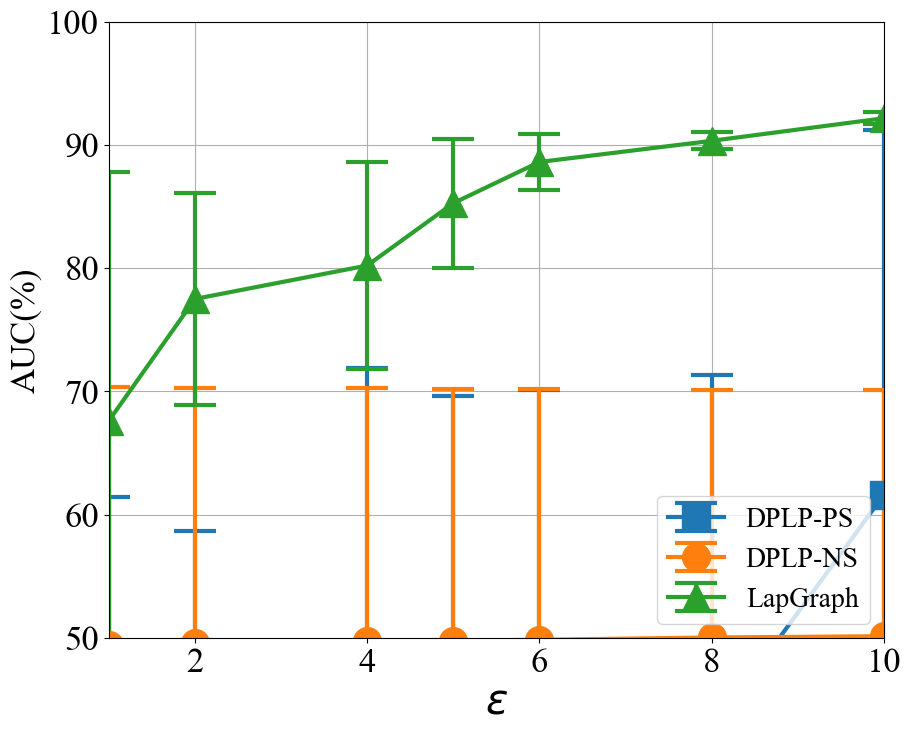

In [16]:
Plotings(sub_df_list, markers=compares_markers, labels=["DPLP-PS", "DPLP-NS", "LapGraph"], metric_name="AUC(%)",
         x_label=r'$\varepsilon$', save_file_path=f"./results_figures/{data_name}_comparison.pdf")

----
# Analysis on Validation Trend During Training

In [109]:
# The results file path
# file_path_1 = "./results/DPLP-PS_latest.csv"
file_path_1 = "./results/all_results_2023-09-09-13-54-48.csv"
# file_path_2 = "./results/DPLP-NS.csv"
# file_path_3 = "./results/LapGraph.csv"

In [110]:
import numpy as np

dtypes = {"epsilon": "Int32"}
df = load_table(file_path_1, dtypes=dtypes)
df
# df["val_trend"] = np.array(df["val_trend"].values.split(","))
# df["val_trend"] = df["val_trend"].apply(lambda x: x.split(","))
# df["val_trend"] = df["val_trend"].apply(lambda x: list(map(float, x.split(","))))
# df["val_trend"].values
# print(df["val_trend"][26])

,dataset,experiment,max_node_degree,num_hop,highest_val,final_test,val_std,test_std,best_epoch,final_round_val,...,dp_method,sens,parameter_indicator,eps,lr,max_norm,batch_size,train_samples,neighborhood_subgraph,val_trend
8,Celegans,results/Celegans_2023-09-08-19-47-04,40,2,77.666310,84.183116,0.254276,2.815104e-01,21.285714,56.206293,...,DPLP,64,0.027739,6.872202,0.100,1,32,3143,False,"0.5007931814555114,0.5685703021598941,0.514483..."
11,Celegans,results/Celegans_2023-09-08-19-48-29,40,2,77.809693,83.914222,0.165688,1.586764e-01,25.285714,61.624098,...,DPLP,160,0.027739,7.052808,0.100,1,128,3143,False,"0.6412613931833329,0.7050890334450358,0.698440..."
15,Celegans,results/Celegans_2023-09-08-19-51-59,40,2,77.740700,84.328014,0.118861,1.115501e-01,29.142857,61.697080,...,DPLP,160,0.027739,7.311368,0.100,1,1024,3143,False,"0.5557151305229365,0.5596646109656163,0.585447..."
21,Celegans,results/Celegans_2023-09-08-20-17-09,40,2,77.656923,84.425808,0.248803,1.683586e-01,30.571429,57.792186,...,DPLP,160,0.027739,7.335280,0.100,1,3143,3143,False,"0.6229924061089053,0.6713623947509222,0.695493..."
26,Celegans,results/Celegans_2023-09-08-21-31-25,40,2,77.777074,83.934342,0.147735,3.250550e-01,32.428571,65.803084,...,DPLP,64,0.027739,8.040885,0.010,1,32,3143,False,"0.5281391681450819,0.5295917696863882,0.498563..."
27,Celegans,results/Celegans_2023-09-08-21-32-52,40,2,77.757362,83.870550,0.264783,4.984171e-01,25.857143,72.050679,...,DPLP,160,0.027739,7.270271,0.010,1,128,3143,False,"0.5437587414228455,0.5528709413984398,0.546769..."
28,Celegans,results/Celegans_2023-09-08-21-36-31,40,2,77.804530,84.398045,0.097638,3.750570e-01,30.428571,73.315780,...,DPLP,160,0.027739,7.495586,0.010,1,1024,3143,False,"0.5313588277810631,0.533147006092009,0.5494353..."
29,Celegans,results/Celegans_2023-09-08-22-01-00,40,2,76.353337,83.515716,3.269388,2.296793e+00,24.714286,74.491707,...,DPLP,160,0.027739,6.431103,0.010,1,3143,3143,False,"0.5299132663118471,0.5389292519688735,0.557125..."
38,Celegans,results/Celegans_2023-09-08-23-15-02,40,2,69.426375,69.309079,7.241541,1.296602e+01,39.142857,69.024152,...,DPLP,64,0.027739,8.692103,0.001,1,32,3143,False,"0.5279373527451588,0.525977866013348,0.5277191..."
40,Celegans,results/Celegans_2023-09-08-23-16-25,40,2,65.328584,63.912163,5.237856,1.053455e+01,39.571429,63.186994,...,DPLP,160,0.027739,9.122202,0.001,1,128,3143,False,"0.5287047206030057,0.5275736156871579,0.528463..."


In [153]:
dataname = "Yeast"
comparison_line_label = "lr"
batch_size = '4096'
q = f"""
SELECT df.{comparison_line_label}, df.val_trend
FROM df
WHERE df.dataset == '{dataname}' and df.batch_size == {batch_size}
ORDER BY df.{comparison_line_label} ASC
"""

In [154]:
sub_df = return_sql(q)
sub_df["val_trend"] = sub_df["val_trend"].apply(lambda x: list(map(lambda z:round(float(z)*100,4), x.split(','))))
sub_df

,lr,val_trend
0,0.001,"[55.8439, 56.5545, 58.2721, 57.7309, 58.5279, ..."
1,0.010,"[73.6543, 66.0362, 60.5778, 51.7073, 53.4804, ..."
2,0.100,"[44.6385, 47.873, 60.2611, 47.9915, 60.8202, 6..."


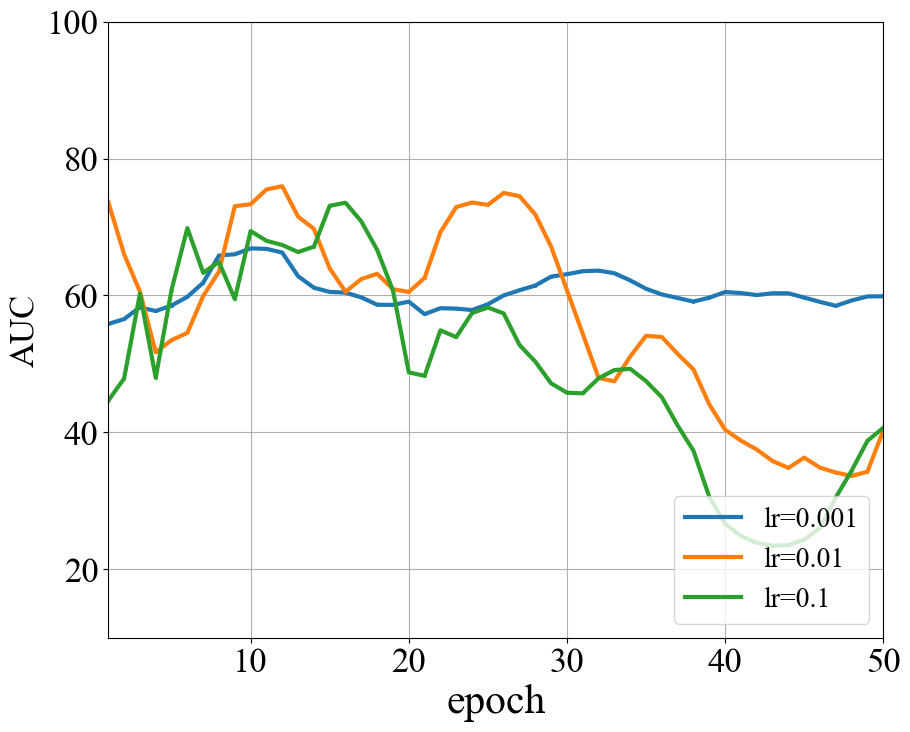

In [156]:
epochs = np.arange(1, 51)
df_list = []
label_list = [] # The lable of comparison line
epsilon_list = []
for idx, (label, row) in sub_df.iterrows():
    assert len(epochs) == len(row), "same length assertion!"
    df_tmp = pd.DataFrame.from_dict({"epochs": epochs, "AUC": row})
    df_list.append(df_tmp)
    label_list.append(f"{comparison_line_label}={label}")
Plotings(df_list, compares_markers, labels=label_list, metric_name="AUC", x_label="epoch", errorbar=False, y_lim=(10, 100), marker_size=1, save_file_path=f'./results_figures/{dataname}_val_trend_with_varying_{comparison_line_label}_batch_{batch_size}.pdf')